# Prabal Ghosh Roll-AM.SC.P2CSC20040 Assignment-3 (Machine learning)-Stochastic Gradient Descent


In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# used for direct plot in jupiter note book
%matplotlib inline  


num :int or str or Figure, optional
A unique identifier for the figure.

If a figure with that identifier already exists, this figure is made active and returned. An integer refers to the Figure.number attribute, a string refers to the figure label.

If there is no figure with the identifier or num is not given, a new figure is created, made active and returned. If num is an int, it will be used for the Figure.number attribute, otherwise, an auto-generated integer value is used (starting at 1 and incremented for each new figure). If num is a string, the figure label and the window title is set to this value.

figsize(float, float), default: rcParams["figure.figsize"] (default: [6.4, 4.8])
Width, height in inches.

In [2]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# advertising.csv FILE IS TAKEN

In [3]:
d=pd.read_csv('C:/Users/Prabal Ghosh/Desktop/advertising.csv')

In [4]:
d.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
X = d.iloc[:, 2]
X

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: radio, Length: 200, dtype: float64

In [6]:
Y = d.iloc[:, 4]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

200


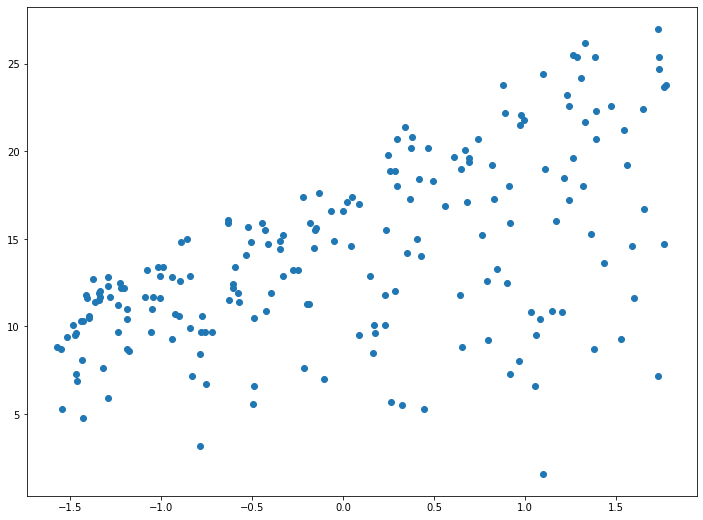

In [7]:
# here i am choosing 3rd column for x values and 4th column for y values 
X = d.iloc[:, 2]
Y = d.iloc[:, 4]
#X = d['GrLivArea']
#Y = d['SalePrice']
X=(X - X.mean()) / X.std()
#Y=(Y - Y.mean()) / Y.std()
plt.scatter(X, Y)
# no need to write down plt.show() as we already specify %matplotlib inline 
#plt.show() 
print(X.size)

# Gradient Descent

In [8]:
# Building the model
def bgd():
    theta1 = 0
    theta0 = 0

    L_R = 0.01  # The learning Rate
    iters = 10000 # The number of iterations to perform gradient descent

    m = X.size # Number of elements in X
    J=np.zeros(iters) #to store cost
    k=np.zeros(iters)
    parameters_0 = np.zeros(iters)
    parameters_1 = np.zeros(iters)
# Gradient Descent Algorithm
    for i in range(iters): 
        Y_pred = theta1*X + theta0  # The current predicted value of Y
        J[i]=(1/2*m)*sum(np.square(Y_pred-Y))
        Grad_theta1 = (2/m) * sum(X * (Y_pred-Y))  # Partial Derivative wrt theta1
        Grad_theta0 = (2/m) * sum(Y_pred-Y)  # Partial Derivative wrt theta0
        theta1=theta1- L_R * Grad_theta1  # Update m
        theta0 = theta0 - L_R * Grad_theta0  # Update c
        k[i]=i
        parameters_0[i]=theta0
        parameters_1[i]=theta1
    
    
#print (theta1, theta0)
    print(parameters_0)
    print(parameters_1)
    return(parameters_0,parameters_1,theta0,theta1,J,k)
%timeit bgd()
parameters_0_F,parameters_1_F,theta0_F,theta1_F,J_F,k_F=bgd()

[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.006

In [9]:
min(J_F)

361847.9549025084

In [10]:
J_F[-1]

361847.9549025089

In [11]:
min(parameters_0_F)

0.28045000000000003

In [12]:
min(parameters_1_F)

0.05982768347462589

In [13]:
theta1_F

3.0064162550063362

In [14]:
theta0_F

14.022499999999962

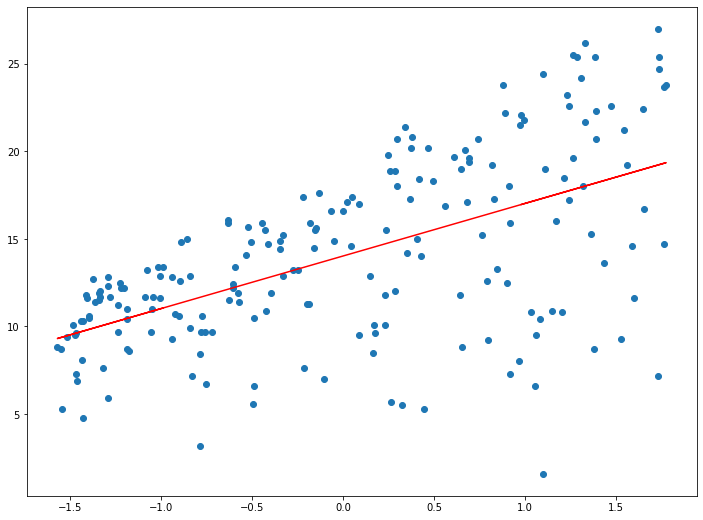

In [15]:
# Making predictions
Y_pred = theta1_F*X + theta0_F

plt.scatter(X, Y)
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.plot(X, Y_pred, color='red') # predicted

#plt.show()

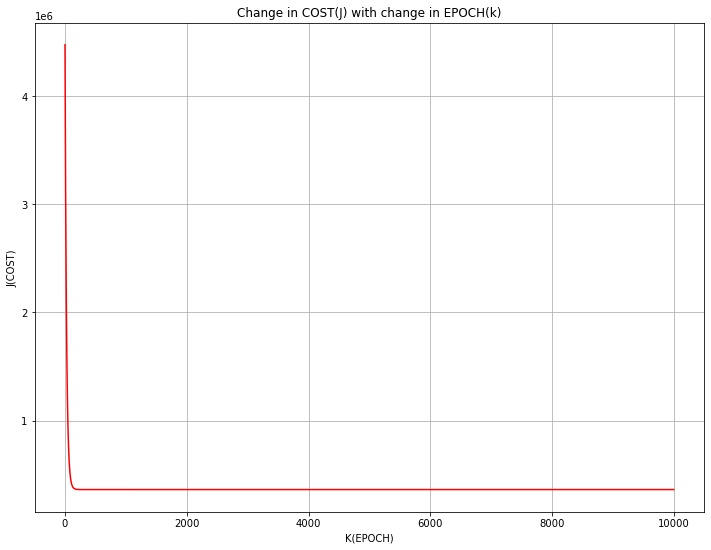

In [16]:
# plot between epoch (ie, the number of iteration vs cost )
plt.plot(k_F, J_F, color='red')
plt.xlabel('K(EPOCH)')
plt.ylabel('J(COST)')
plt.title('Change in COST(J) with change in EPOCH(k)')
plt.grid(True)

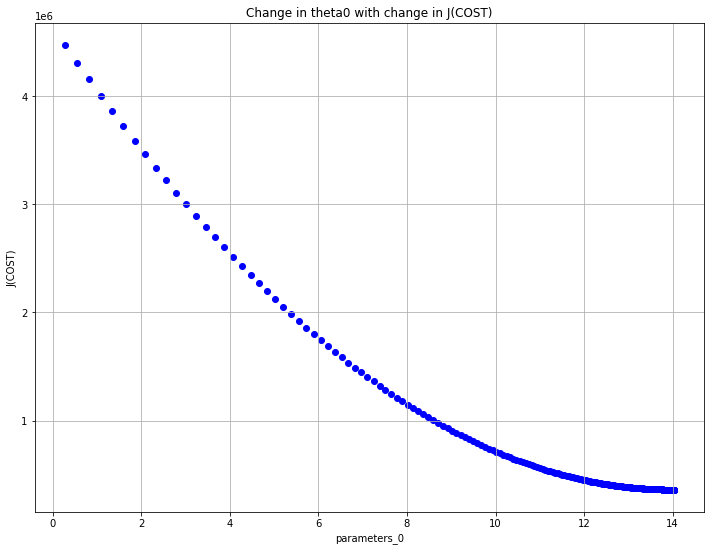

In [17]:
plt.scatter(parameters_0_F, J_F, color='blue')
plt.xlabel('parameters_0')
plt.ylabel('J(COST)')
plt.title('Change in theta0 with change in J(COST)')
plt.grid(True)

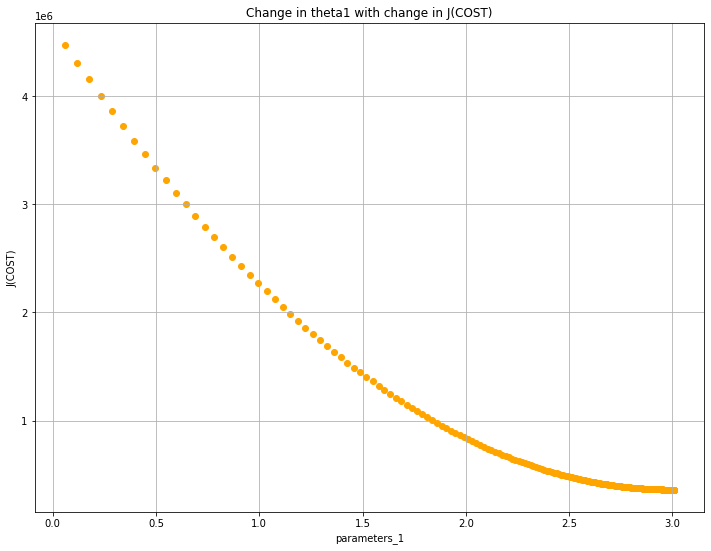

In [18]:
plt.scatter(parameters_1_F, J_F, color='orange')
plt.xlabel('parameters_1')
plt.ylabel('J(COST)')
plt.title('Change in theta1 with change in J(COST)')
plt.grid(True)

# Building the Stochastic Gradient Descent model

In [19]:
# Building the Stochastic Gradient Descent model
def sgd():
    theta11 = 1
    theta00 = 13

    L_R = 0.001# The learning Rate
    iters = 10000  #number of iterations to perform gradient descent

    m = X.size # Number of elements in X
    J=np.zeros(iters) #to store cost
    k=np.zeros(iters)
    parameters_00 = np.zeros(iters)
    parameters_11 = np.zeros(iters)
# Gradient Descent Algorithm
    for i in range(iters): 
        ind = np.random.randint(0, m)
    
    
        Xs = X[ind]
        ys = Y[ind]
        #N = len(Xs)
    
        Y_pred1 = theta11*Xs + theta00# The current predicted value of Y
    
        J[i]=(1/2)*(np.square(Y_pred1-ys))
    
        Grad_theta11 = (2) *(Xs * (Y_pred1-ys))  # Partial Derivative wrt theta1
        Grad_theta00 = (2) *(Y_pred1-ys)  # Partial Derivative wrt theta0
        theta11=theta11- L_R * Grad_theta11 # Update m
        theta00 = theta00 - L_R * Grad_theta00  # Update c
        k[i]=i
        parameters_00[i]=theta00
        parameters_11[i]=theta11
    
    
#print (theta1, theta0)
    print(parameters_00)
    return(parameters_00,parameters_11,theta00,theta11,J,k)
%timeit sgd()
parameters_0_F,parameters_1_F,theta0_F,theta1_F,J_F,k_F=sgd()

[12.9958261  12.99552721 13.00694802 ... 14.03614812 14.04017626
 14.04357627]
[12.98806881 12.97244873 12.96535463 ... 14.06832548 14.06538359
 14.06335202]
[12.99613181 12.99509973 12.98373937 ... 13.96388795 13.97328007
 13.9692978 ]
[12.99495778 12.98849385 12.99980154 ... 13.73670877 13.74183325
 13.72931301]
[12.99306445 12.99269785 12.99225631 ... 13.70517214 13.70465352
 13.69289329]
[12.9967443  13.01298776 13.00655767 ... 14.23157612 14.21910387
 14.22212112]
[12.99473387 13.00046444 12.98533151 ... 14.17763563 14.18130509
 14.1839025 ]
[13.01346566 12.99963696 12.98612616 ... 14.19384759 14.19656051
 14.193838  ]
1.35 s ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[12.98434855 13.00417499 13.00341072 ... 14.22546866 14.23067168
 14.23659056]


In [20]:
min(parameters_0_F)

12.984348546890768

In [21]:
min(parameters_1_F)

0.9949019061039901

In [22]:
min(J_F)

4.961183207343868e-07

In [23]:
theta0_F

14.236590560688938

In [24]:
theta1_F

3.499506582350516

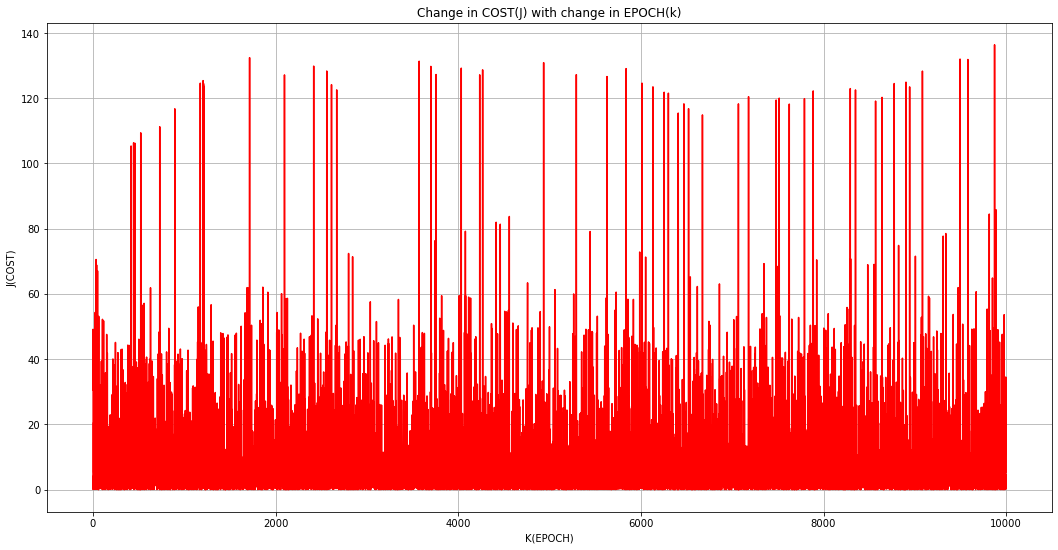

In [25]:
plt.rcParams['figure.figsize'] = (18.0, 9.0)


# plot between epoch (ie, the number of iteration vs cost )
plt.plot(k_F, J_F, color='red')
plt.xlabel('K(EPOCH)')
plt.ylabel('J(COST)')
plt.title('Change in COST(J) with change in EPOCH(k)')
plt.grid(True)

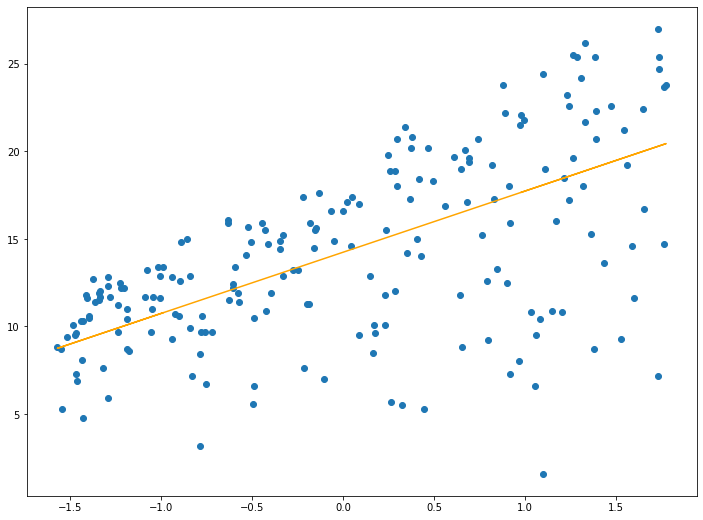

In [26]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)


# Making predictions
Y_pred = theta1_F*X + theta0_F

plt.scatter(X, Y)
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.plot(X, Y_pred, color='orange') # predicted

#plt.show()

# train.csv FILE IS TAKEN

In [27]:
d=pd.read_csv('C:/Users/Prabal Ghosh/Desktop/train.csv')

In [28]:
d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [45]:
#d.dropna(axis=0,how='any' ,thresh=None, subset=['LotFrontage','SalePrice'], inplace=True)
#d.fillna(0)
# d.mean(axis = 1, skipna = True)
d.mean(axis = 1, skipna = True)[3]


4302.605263157895

In [46]:
# fill those nan values of LotFrontage column with the mean of this column
d['LotFrontage'] = d['LotFrontage'].fillna(d.mean(axis = 1, skipna = True)[3])

In [47]:
d.loc[:,"LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [48]:
d.iloc[:,80].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [49]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [50]:
X = d['LotFrontage']
X

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [51]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

1460


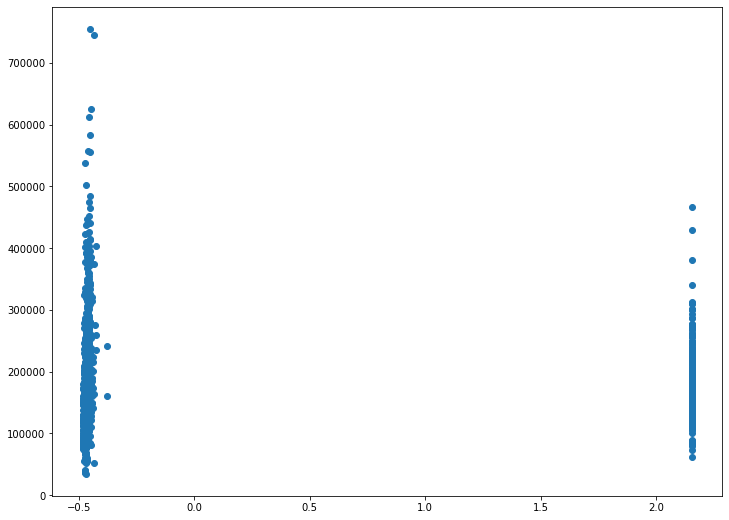

In [52]:
X= d['LotFrontage']
Y = d.iloc[:, 80]
#X = d['GrLivArea']
#Y = d['SalePrice']
X=(X - X.mean()) / X.std()
#Y=(Y - Y.mean()) / Y.std()
plt.scatter(X, Y)
# no need to write down plt.show() as we already specify %matplotlib inline 
#plt.show() 
print(X.size)

In [53]:
# Building the Stochastic Gradient Descent model
def sgd1():
    theta11 = 1
    theta00 = 13

    L_R = 0.001 # The learning Rate
    iters = 10000  #number of iterations to perform gradient descent

    m = X.size # Number of elements in X
    J=np.zeros(iters) #to store cost
    k=np.zeros(iters)
    parameters_00 = np.zeros(iters)
    parameters_11 = np.zeros(iters)
# Gradient Descent Algorithm
    for i in range(iters): 
        ind = np.random.randint(0, m)
    
    
        Xs = X[ind]
        ys = Y[ind]
        #N = len(Xs)
    
        Y_pred1 = theta11*Xs + theta00 # The current predicted value of Y
    
        J[i]=(1/2)*(np.square(Y_pred1-ys))
    
        Grad_theta11 = (2) *(Xs * (Y_pred1-ys))  # Partial Derivative wrt theta1
        Grad_theta00 = (2) *(Y_pred1-ys)  # Partial Derivative wrt theta0
        theta11=theta11- L_R * Grad_theta11 # Update m
        theta00 = theta00 - L_R * Grad_theta00  # Update c
        k[i]=i
        parameters_00[i]=theta00
        parameters_11[i]=theta11
       
    print(parameters_00)
    
#print (theta1, theta0)
     
    return(parameters_00,parameters_11,theta00,theta11,J,k)
%timeit sgd1()
parameters_0_F,parameters_1_F,theta0_F,theta1_F,J_F,k_F=sgd1()

[   314.97495708    534.20971312    860.90910003 ... 180012.96404417
 179907.68457273 179934.42343333]
[   364.97493561    788.9495528    1188.05365624 ... 179152.33362861
 179055.07482537 179246.61984999]
[   273.46969484    607.50462455    899.52086352 ... 183720.7371662
 183547.98911825 183479.08315116]
[   702.97492488   1089.03029211   1516.99671634 ... 180431.39476821
 180341.96245671 180617.74073315]
[   803.35891916   1027.42365893   1491.41474485 ... 178684.35517962
 178629.14742526 178579.22725468]
[   212.97493204    602.94588351    937.43913122 ... 181691.27848626
 181579.95278021 181528.55149149]
[   306.56969484    732.23168011   1347.09764505 ... 181096.3043835
 181157.80857718 181124.29554831]
[   582.97491773    843.43063684   1156.25174829 ... 179831.53493852
 179750.03635886 179692.77643544]
1.42 s ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[1.72969695e+02 5.37536979e+02 8.15503078e+02 ... 1.77976876e+05
 1.77918885e+05 1.77792037e+05]


In [54]:
min(parameters_0_F)

172.96969483942976

In [55]:
min(parameters_1_F)

-4954.767368686897

In [56]:
min(J_F)

59.209179776275896

In [57]:
theta0_F

177792.0371933079

In [58]:
theta1_F

47.54793611431043

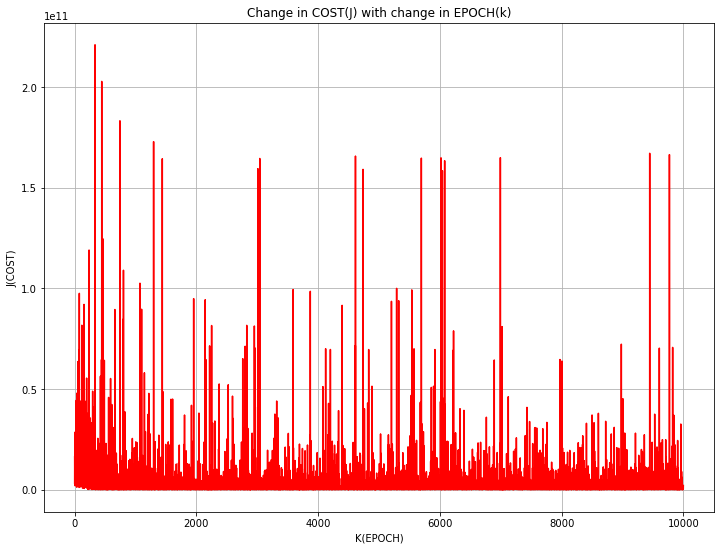

In [59]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)


# plot between epoch (ie, the number of iteration vs cost )
plt.plot(k_F, J_F, color='red')
plt.xlabel('K(EPOCH)')
plt.ylabel('J(COST)')
plt.title('Change in COST(J) with change in EPOCH(k)')
plt.grid(True)

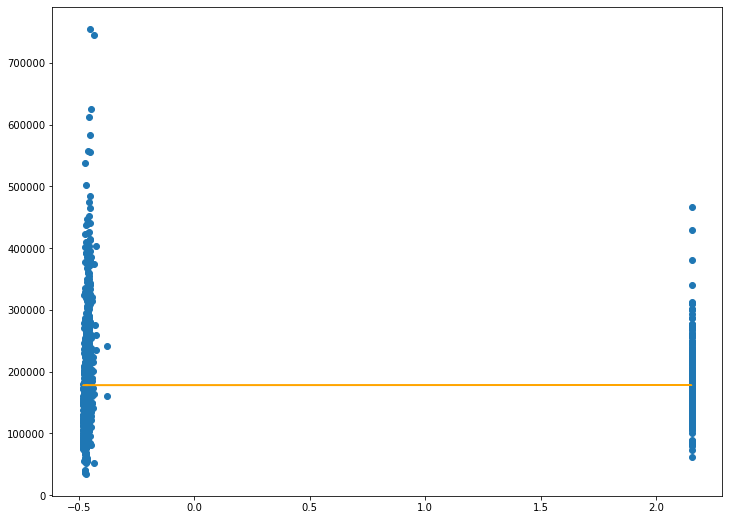

In [60]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)


# Making predictions
Y_pred = theta1_F*X + theta0_F

plt.scatter(X, Y)
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.plot(X, Y_pred, color='orange') # predicted

#plt.show()